<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



C:\Users\rahim\AppData\Local\Temp\ipykernel_6656\2075959860.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_medians = df_clean.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


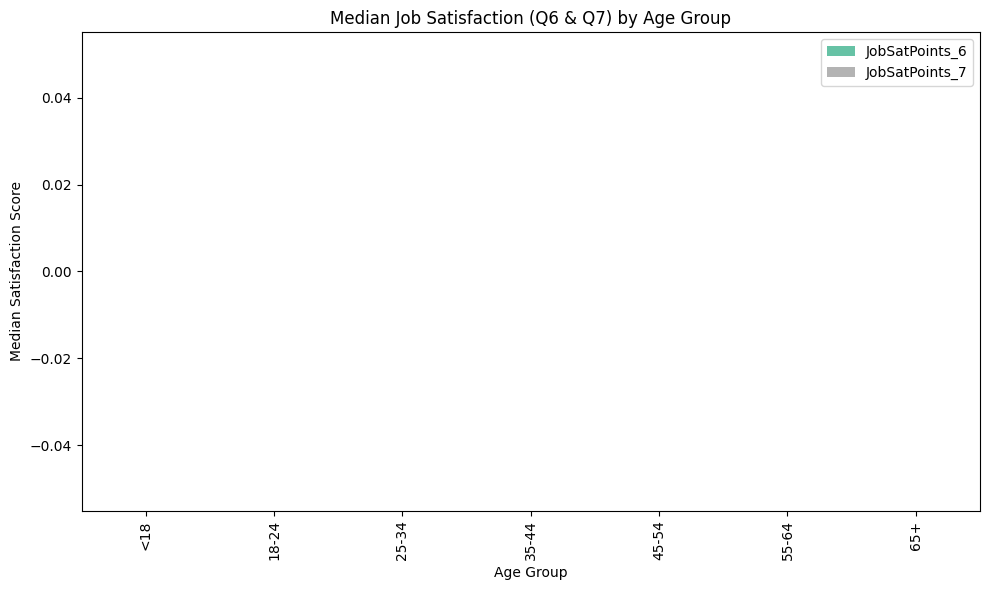

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Age to numeric (coerce errors into NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing values in the required columns
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age group column
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)

# Group by AgeGroup and calculate median Job Satisfaction scores
age_group_medians = df_clean.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot stacked bar chart
age_group_medians.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Median Job Satisfaction (Q6 & Q7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


C:\Users\rahim\AppData\Local\Temp\ipykernel_6656\4209421332.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


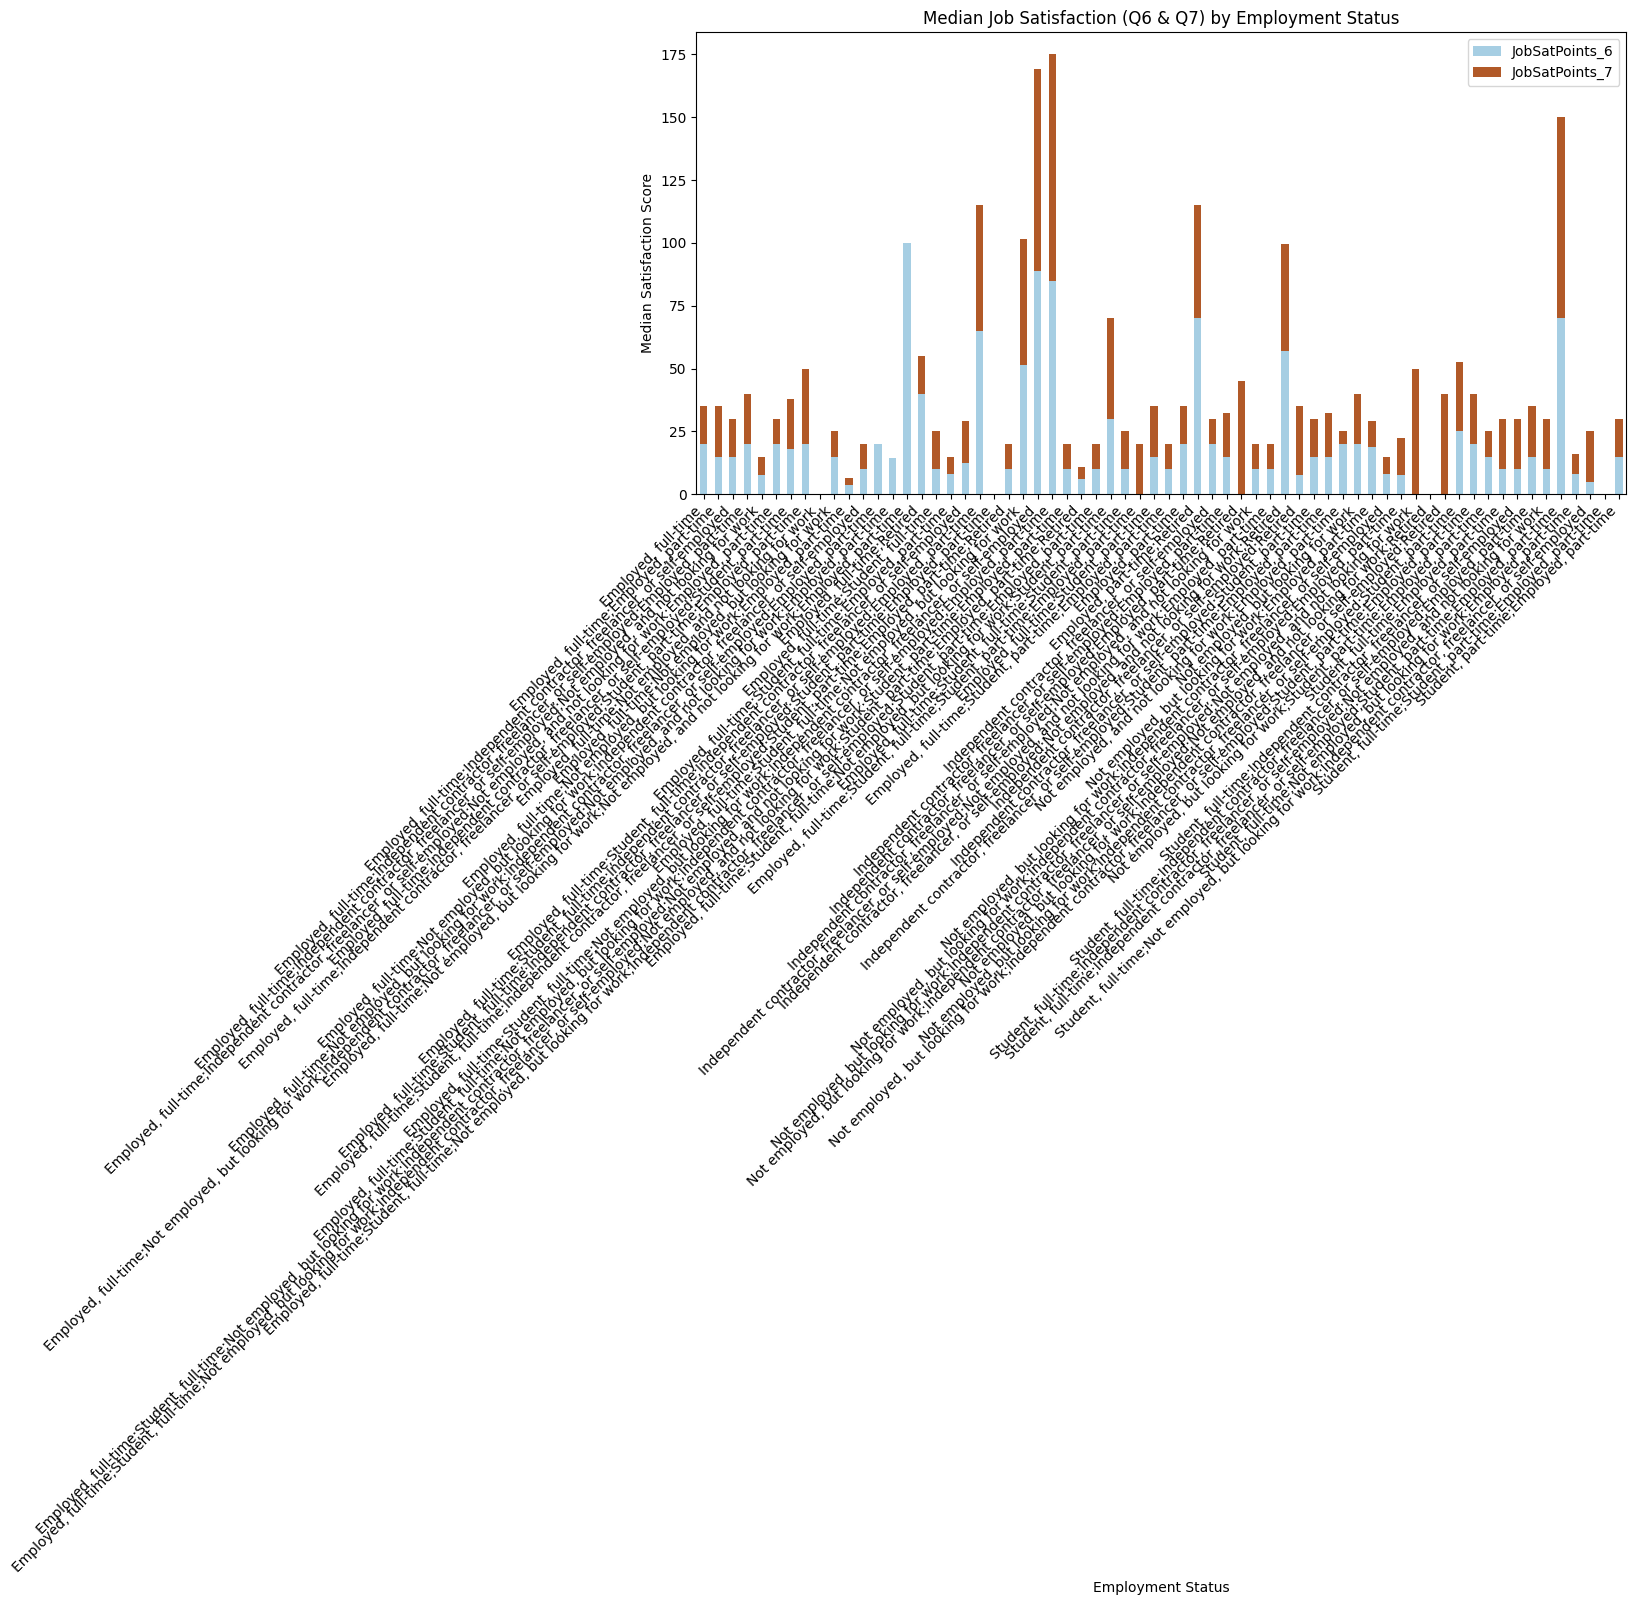

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing data in required columns
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Employment status and calculate median satisfaction scores
employment_medians = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot a stacked bar chart
employment_medians.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Median Job Satisfaction (Q6 & Q7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


IndexError: index 0 is out of bounds for axis 0 with size 0

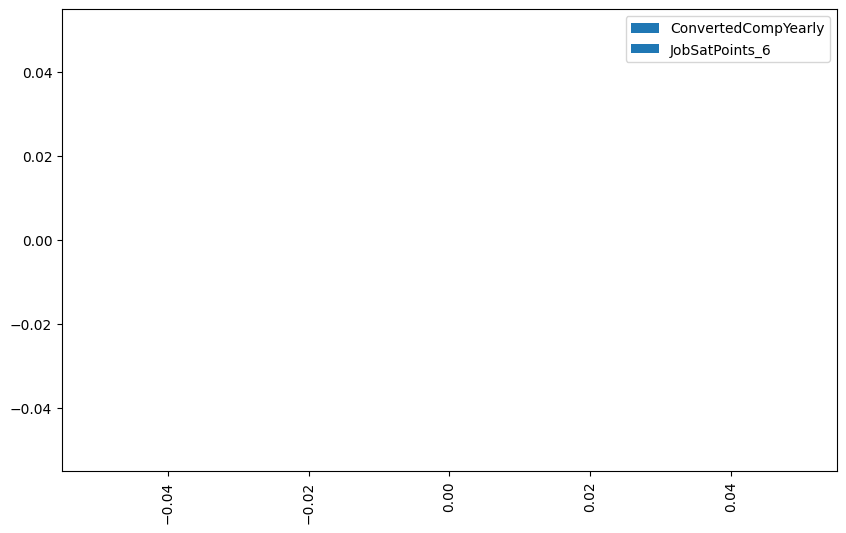

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with necessary data missing
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Filter respondents aged 30 to 35
df_age_30_35 = df_filtered[(df_filtered['Age'] >= 30) & (df_filtered['Age'] <= 35)]

# Optional: group by smaller age buckets (e.g., individual ages or round down to make bins)
# For this example, we'll group by age directly
grouped = df_age_30_35.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Plot a stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Median Compensation and Job Satisfaction (Age 30–35)')
plt.xlabel('Age')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(['ConvertedCompYearly', 'JobSatPoints_6'])
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


C:\Users\rahim\AppData\Local\Temp\ipykernel_6656\813181403.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_clean.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()


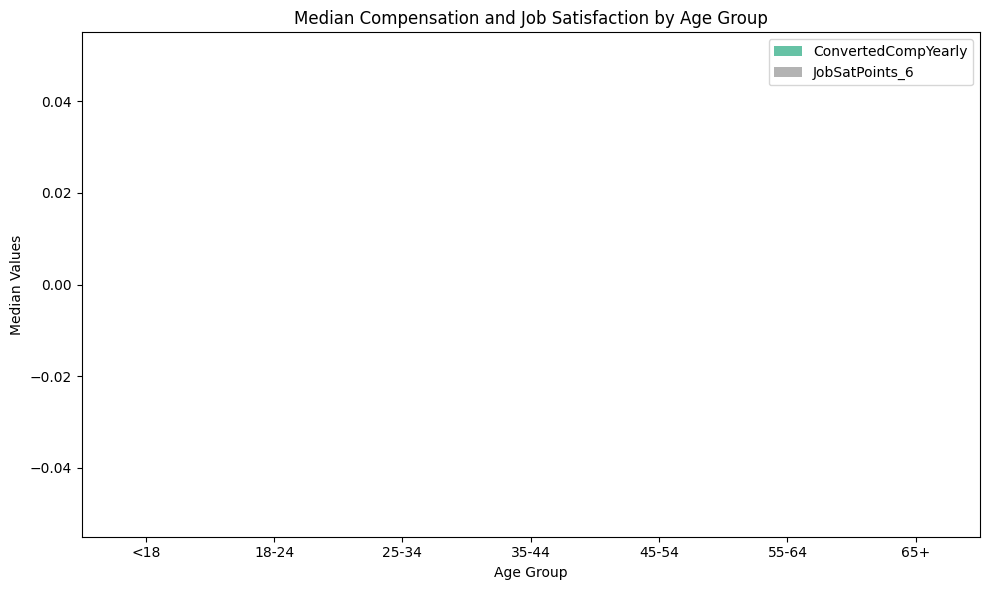

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Create age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)

# Group by AgeGroup and calculate medians
age_group_stats = df_clean.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Plot stacked bar chart
age_group_stats.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Median Compensation and Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.xticks(rotation=0)
plt.legend(['ConvertedCompYearly', 'JobSatPoints_6'])
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [29]:
[df_col for df_col in df.columns if 'Database' in df_col]

['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Explode semicolon-separated database entries
df_expanded = df[['Age', 'DatabaseWantToWorkWith']].dropna().copy()
df_expanded['Database'] = df_expanded['DatabaseWantToWorkWith'].str.split(';')
df_expanded = df_expanded.explode('Database')
df_expanded['Database'] = df_expanded['Database'].str.strip().str.lower()

# Step 2: Use the existing Age column (which contains age ranges) as AgeGroup
df_expanded['AgeGroup'] = df_expanded['Age']

# Step 3: Get top 5 most common databases
top_databases = df_expanded['Database'].value_counts().nlargest(5).index.tolist()
print("Top 5 Databases:", top_databases)

# Step 4: Filter to only top databases
df_top = df_expanded[df_expanded['Database'].isin(top_databases)]

# Step 5: Pivot for age group vs database counts
pivot = df_top.pivot_table(index='AgeGroup', columns='Database', aggfunc='size', fill_value=0)

# Step 6: Plot
if pivot.empty:
    print("❌ Pivot table is empty. Cannot plot.")
else:
    pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    plt.title('Top 5 Preferred Databases by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Mentions')
    plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Top 5 Databases: []
❌ Pivot table is empty. Cannot plot.


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


C:\Users\rahim\AppData\Local\Temp\ipykernel_6656\580643550.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


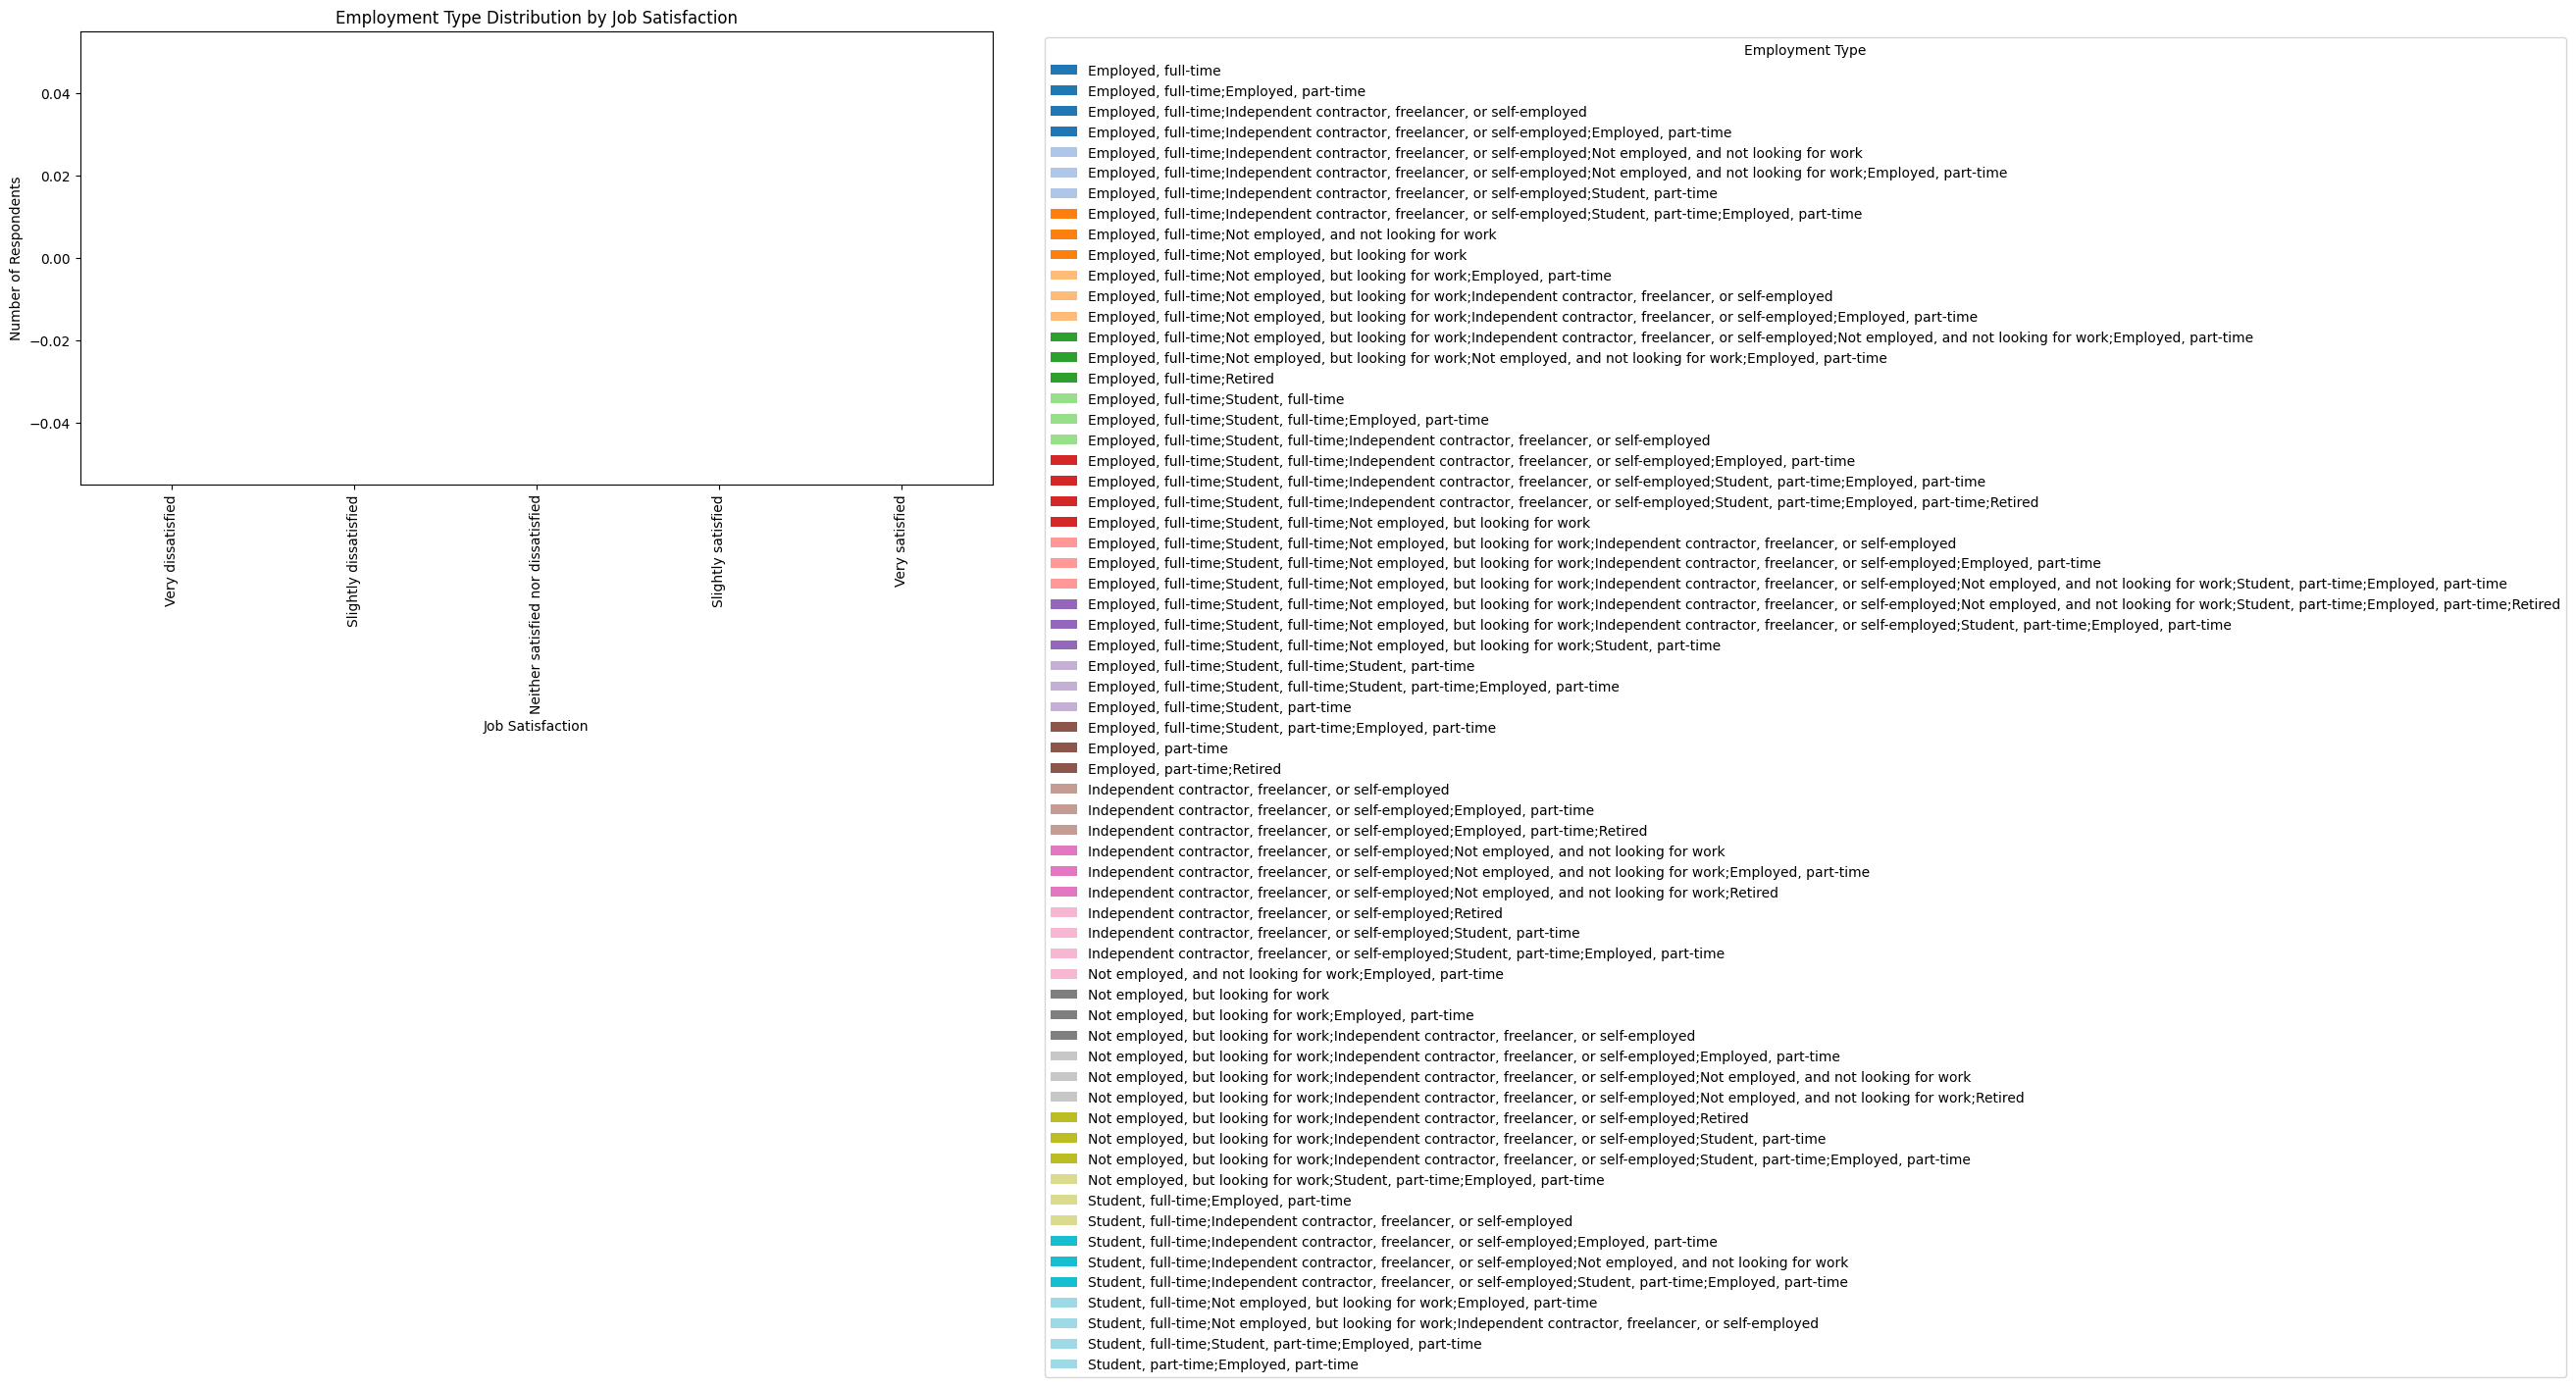

In [33]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing values in required columns
df_clean = df[['Employment', 'JobSat']].dropna()

# Step 2: Group by Job Satisfaction and Employment, count occurrences
grouped = df_clean.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Optional: Sort satisfaction levels in a more logical order (if known)
ordered_levels = [
    'Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied',
    'Slightly satisfied', 'Very satisfied'
]
grouped = grouped.reindex(ordered_levels)

# Step 3: Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Type Distribution by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


C:\Users\rahim\AppData\Local\Temp\ipykernel_6656\3758190888.py:36: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_top.pivot_table(index='AgeGroup', columns='LanguageAdmired', aggfunc='size', fill_value=0)


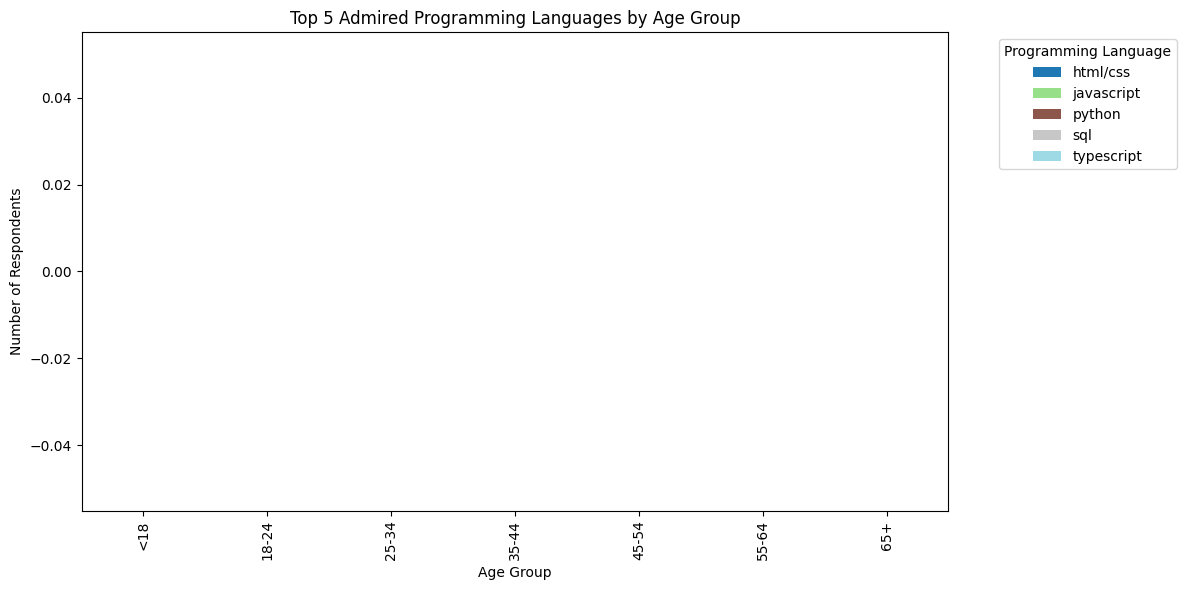

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (assume it's already loaded as df)

# 1. Drop missing admired language responses
df = df.dropna(subset=['LanguageAdmired'])

# 2. Filter relevant columns
df_lang = df[['Age', 'LanguageAdmired']].copy()

# 3. Define age groups
bins = [0, 17, 24, 34, 44, 54, 64, 120]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_lang['AgeGroup'] = pd.cut(df_lang['Age'], bins=bins, labels=labels, right=False)

# 4. Explode multiple admired languages into individual rows
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.split(';')
df_exploded = df_lang.explode('LanguageAdmired')

# Normalize casing for grouping
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip().str.lower()

# 5. Get top 5 admired languages overall
top_languages = (
    df_exploded['LanguageAdmired']
    .value_counts()
    .head(5)
    .index
)

# 6. Filter for top 5 admired languages
df_top = df_exploded[df_exploded['LanguageAdmired'].isin(top_languages)]

# 7. Create pivot table for plotting
pivot = df_top.pivot_table(index='AgeGroup', columns='LanguageAdmired', aggfunc='size', fill_value=0)

# 8. Plot the stacked bar chart
if not pivot.empty:
    pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    plt.title('Top 5 Admired Programming Languages by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Respondents')
    plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Pivot table is empty. Cannot plot.")

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


C:\Users\rahim\AppData\Local\Temp\ipykernel_6656\3786770311.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


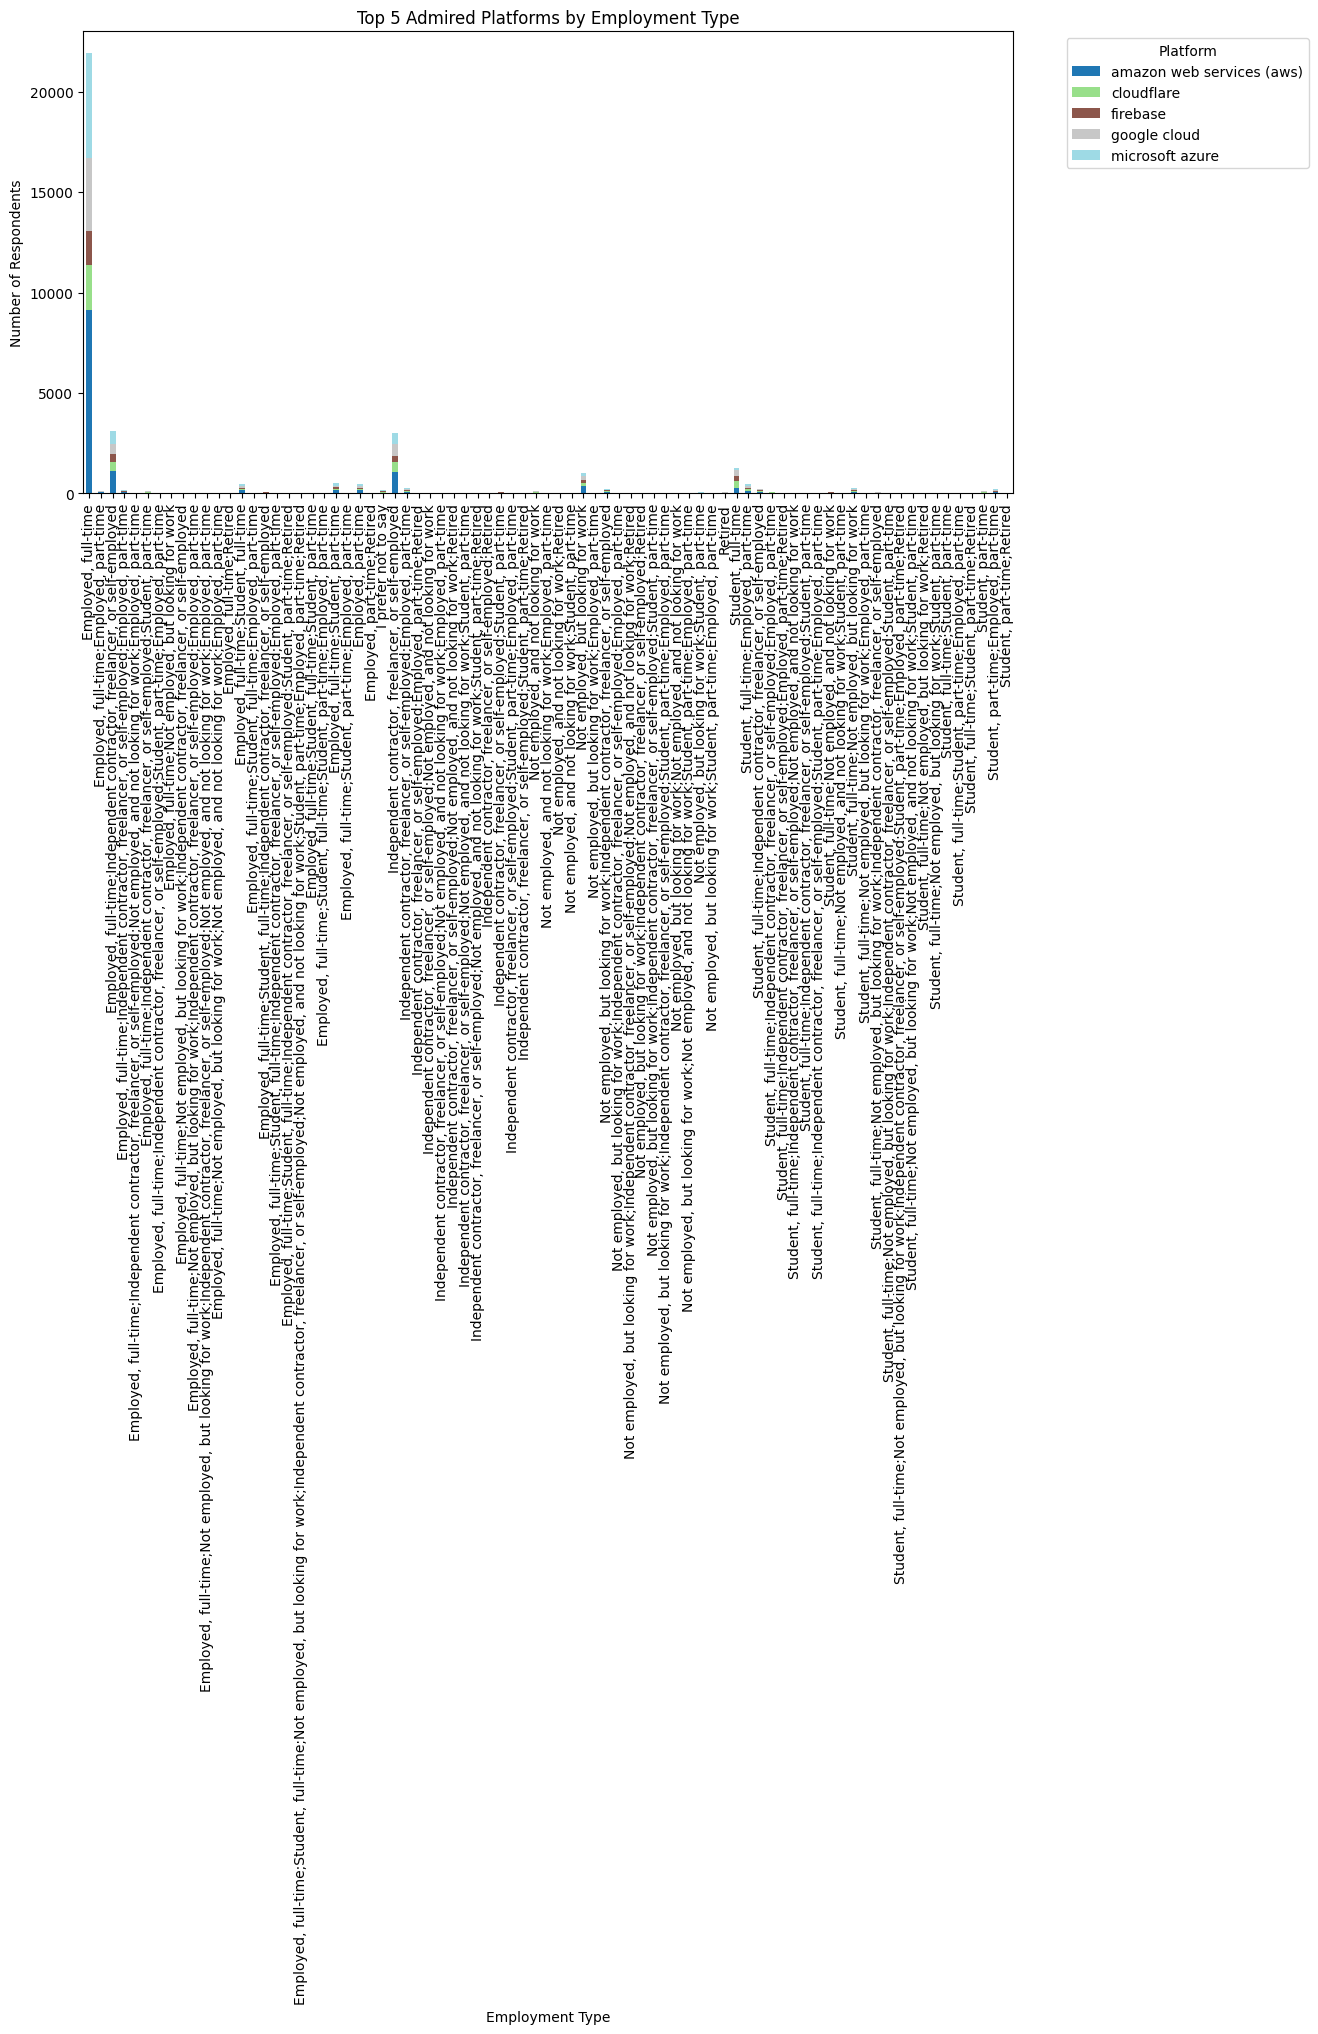

In [36]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (assume it's already loaded as df)

# 1. Drop missing values
df_platforms = df.dropna(subset=['PlatformAdmired', 'Employment'])[['Employment', 'PlatformAdmired']].copy()

# 2. Split multi-valued field into lists
df_platforms['PlatformAdmired'] = df_platforms['PlatformAdmired'].str.split(';')

# 3. Explode into one row per platform
df_exploded = df_platforms.explode('PlatformAdmired')

# 4. Clean and normalize the platform names
df_exploded['PlatformAdmired'] = df_exploded['PlatformAdmired'].str.strip().str.lower()

# 5. Get top 5 admired platforms overall
top_platforms = (
    df_exploded['PlatformAdmired']
    .value_counts()
    .head(5)
    .index
)

# 6. Filter for top platforms only
df_top = df_exploded[df_exploded['PlatformAdmired'].isin(top_platforms)]

# 7. Create pivot table
pivot = df_top.pivot_table(index='Employment', columns='PlatformAdmired', aggfunc='size', fill_value=0)

# 8. Plot the stacked bar chart
if not pivot.empty:
    pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    plt.title('Top 5 Admired Platforms by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Number of Respondents')
    plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Pivot table is empty. Cannot plot.")

In [42]:
conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
